<a href="https://colab.research.google.com/github/Alexanderjulz/MultipleLinearRegressionModel/blob/main/MultipleLinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PACKAGE INSTALLATION
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
!pip install researchpy 
import researchpy as rp 
import scipy.stats as st
import pylab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#import csv file
df = pd.read_csv("/content/drive/MyDrive/rent_apartment_moscow.csv")
#remove columns
df = df.drop(['way'], axis=1)
df = df.drop(['storeys'], axis=1)
df = df.drop(['fee_percent'], axis=1)
df = df.drop(['living_area'], axis=1)
df = df.drop(['kitchen_area'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
#remove (+) from rooms column and "no data" from metro column
df = df[df.metro != 'No data']
df = df[df.rooms != '+']
#remove outliers from storey column > 101 (see assumption)
df['storey'].values[df['storey'].values > 101] = 0
df = df[df.storey != 0]
#remove outliers from price column > 250,000 (see assumption in links below)
df['price'].values[df['price'].values > 250000] = 0
df = df[df.price != 0]
df['views'].values[df['views'].values > 1000] = 0
df = df[df.views != 0]
#convert rooms column from object to int
df['rooms']=df['rooms'].astype(int) 
print(df.dtypes)
df.head(9)
list(df)
df.shape
df.describe()

metro         object
price          int64
minutes        int64
provider      object
views          int64
storey         int64
rooms          int64
total_area     int64
dtype: object


,price,minutes,views,storey,rooms,total_area
count,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000
mean,81540.464654,11.130339,33.313328,7.940722,1.837997,55.980118
std,58923.923048,6.123465,63.275167,6.706624,0.924143,26.421020
min,2700.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,44000.000000,7.000000,11.000000,3.000000,1.000000,40.000000
50%,60000.000000,11.000000,21.000000,6.000000,2.000000,58.000000
75%,100000.000000,14.000000,34.000000,10.000000,2.000000,64.000000
max,250000.000000,57.000000,971.000000,92.000000,8.000000,270.000000


In [ ]:
# Create a data object which contains the three IVs; BA, RS, RA
x = df[['minutes', 'views', 'storey','rooms','total_area']]
#x will show us the independent variables
x

,minutes,views,storey,rooms,total_area
0,13,127,5,2,50
1,3,23,12,1,38
2,5,56,17,4,130
3,10,748,6,2,55
4,10,835,8,1,33
...,...,...,...,...,...
4017,17,19,13,2,56
4019,21,44,3,1,42
4020,14,11,5,1,30
4187,18,4,4,1,3


In [ ]:
# .corr is a pd function that lets us find the create a correlation matrix between our variables
#The correlation test makes use of pearson since we're dealing with continous variables
x.corr(method = 'pearson')

,minutes,views,storey,rooms,total_area
minutes,1.000000,-0.053535,-0.005893,-0.094418,-0.092413
views,-0.053535,1.000000,0.029480,0.047309,0.040774
storey,-0.005893,0.029480,1.000000,-0.022647,0.020894
rooms,-0.094418,0.047309,-0.022647,1.000000,0.594438
total_area,-0.092413,0.040774,0.020894,0.594438,1.000000


In [ ]:
#multiple linear regression model
from statsmodels.formula.api import ols
mdl1 = ols('price~views+rooms+minutes+total_area+storey+provider',data=df).fit()
print(mdl1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     394.1
Date:                Fri, 06 May 2022   Prob (F-statistic):               0.00
Time:                        15:26:27   Log-Likelihood:                -32637.
No. Observations:                2716   AIC:                         6.529e+04
Df Residuals:                    2707   BIC:                         6.535e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               668.62

In [ ]:
#Looking for Linearity in the Multiple Regression Model (Second model since it's the best)
# Create an object that contains predicted values by using .predict()
y_pred = mdl1.predict()
y_pred

array([ 90758.81549436,  51903.84995372, 171743.91853689, ...,
        28053.73694518,   2863.18598072,  46306.09495698])

Text(0.5, 1.0, 'Observed vs. Predicted Values')

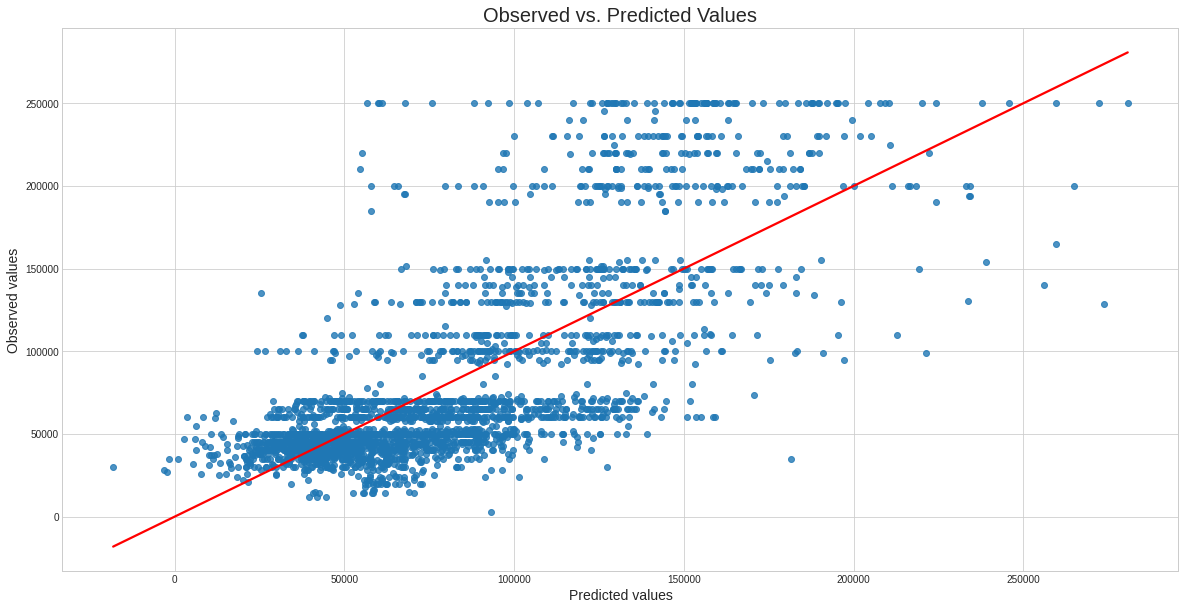

In [ ]:
# Set the style and dimension for a scatter plot.
plt.style.use('seaborn-whitegrid') # Set the style
plt.rcParams['figure.figsize'] = [20, 10]

# Add the predicted values in the x axis and the observed values in the y axis.
sns.regplot(x = y_pred, y = y, ci = None, line_kws = {'color':'red'})
plt.ylabel('Observed values', fontsize = 14)
plt.xlabel('Predicted values', fontsize = 14)
plt.title('Observed vs. Predicted Values', fontsize = 20)

Checking for Homoscedasticity

Text(0, 0.5, 'Residuals')

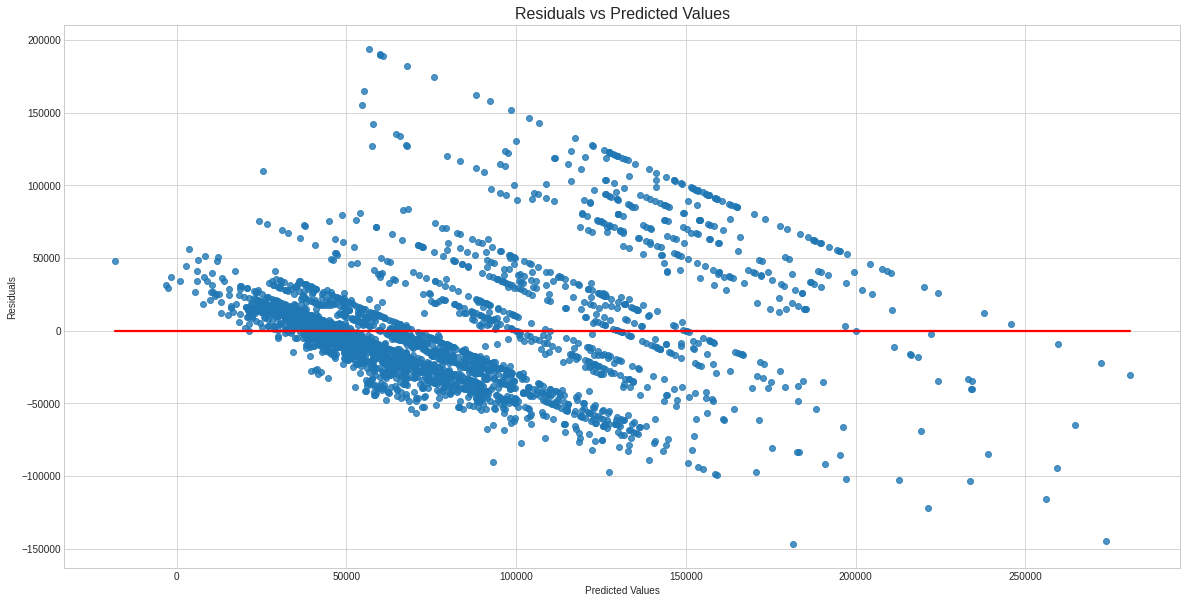

In [ ]:
# Assign residuals/errors to an data object, ‘error’ by using .resid
error = mdl1.resid
# Set the dimension for a scatter plot.
plt.figure(figsize=(20,10))
# Create a scatter plot with predicted value in the x axis and errors in the y axis.
sns.regplot(x = y_pred, y = error, ci = None, line_kws = {'color':'red'})
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

The residuals/errors are equally scattered about the predicted values, suggesting that the data assumption of homoscedasticity has been met.

Text(0.5, 1.0, 'Distribution of Residuals')

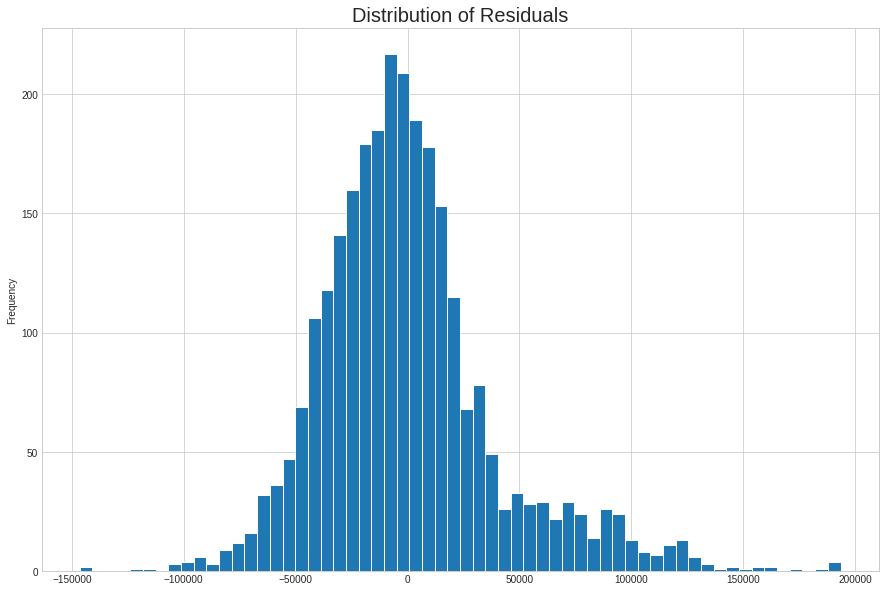

In [ ]:
# Checking the Normal Distribution of Residuals/Error
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [15, 10]
error.plot.hist(grid = True, bins = 60, edgecolor = 'white', linewidth = 1.0)
plt.title('Distribution of Residuals', fontsize = 20)

In [ ]:
#Running a shapiro test for normality
from scipy.stats import shapiro
w, p = shapiro(error)
print("Shapiro-Wilk Normality Test:", "w =", round(w, 3), "p-value =", round(p, 3))

Shapiro-Wilk Normality Test: w = 0.944 p-value = 0.0
